In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0,2500)
x = np.sin(0.02 * t) + np.random.rand(2500) * 2

In [3]:
train,test = x[0:2000], x[2000:]

In [4]:
def convertToDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [5]:
train_step = 10
test_step = 20

x_train, y_train = convertToDataset(train, train_step)
x_test, y_test = convertToDataset(test, test_step)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [7]:
x_train.shape

(1990, 10, 1)

In [8]:
x_test.shape

(480, 20, 1)

In [9]:
model = Sequential()
model.add(SimpleRNN(units = 64, input_shape = (None, 1), activation = "tanh"))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer="rmsprop")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.input

<KerasTensor: shape=(None, None, 1) dtype=float32 (created by layer 'simple_rnn_input')>

In [12]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 16, verbose = 2)

Epoch 1/200
125/125 - 4s - loss: 0.4628 - 4s/epoch - 31ms/step
Epoch 2/200
125/125 - 1s - loss: 0.3962 - 816ms/epoch - 7ms/step
Epoch 3/200
125/125 - 1s - loss: 0.3939 - 712ms/epoch - 6ms/step
Epoch 4/200
125/125 - 1s - loss: 0.3899 - 642ms/epoch - 5ms/step
Epoch 5/200
125/125 - 1s - loss: 0.3844 - 756ms/epoch - 6ms/step
Epoch 6/200
125/125 - 1s - loss: 0.3793 - 596ms/epoch - 5ms/step
Epoch 7/200
125/125 - 1s - loss: 0.3807 - 647ms/epoch - 5ms/step
Epoch 8/200
125/125 - 1s - loss: 0.3786 - 632ms/epoch - 5ms/step
Epoch 9/200
125/125 - 1s - loss: 0.3794 - 683ms/epoch - 5ms/step
Epoch 10/200
125/125 - 1s - loss: 0.3786 - 655ms/epoch - 5ms/step
Epoch 11/200
125/125 - 1s - loss: 0.3807 - 719ms/epoch - 6ms/step
Epoch 12/200
125/125 - 1s - loss: 0.3737 - 713ms/epoch - 6ms/step
Epoch 13/200
125/125 - 1s - loss: 0.3767 - 859ms/epoch - 7ms/step
Epoch 14/200
125/125 - 1s - loss: 0.3723 - 961ms/epoch - 8ms/step
Epoch 15/200
125/125 - 1s - loss: 0.3765 - 1s/epoch - 8ms/step
Epoch 16/200
125/125 - 1

In [13]:
train_score = model.evaluate(x_train, y_train, verbose = 0)

In [14]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
Predict = np.concatenate((train_predict, test_predict), axis=0)

15/15 [==============================] - 0s 3ms/step


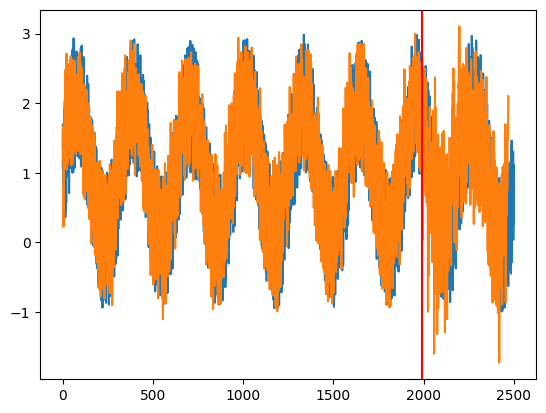

In [15]:
plt.plot(x)
plt.plot(Predict)
plt.axvline(len(x_train), c="r")
plt.show()